In [2]:
import pandas as pd 
data = pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [17]:
data.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [18]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [19]:
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [20]:
data.duplicated().sum()

0

In [21]:
data.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


1) Who is the top run scorer?

In [22]:
batsman_list=data['batter'].unique().tolist()

def batsman_runs(data,batsman_list):
    batsman_dict={}
    for batsman in batsman_list:
        x=[]
        total_runs=data[data['batter']==batsman]['batsman_runs'].sum()
        x.append(total_runs)
        x.append(len(data[data['batter']==batsman]['match_id'].unique()))
        batsman_dict[batsman] = x
    return batsman_dict
batsman_dict=batsman_runs(data,batsman_list)
top_scorer = max(batsman_dict,key=batsman_dict.get)
print(f'The top-scorer is {top_scorer} with {batsman_dict[top_scorer][0]} runs in {batsman_dict[top_scorer][1]} innings.')

The top-scorer is V Kohli with 8014 runs in 244 innings.


The Top Scorer are :
   1) V Kohli has scored 8014 runs in 244 innings.
   2) S Dhawan has scored 6769 runs in 221 innings.
   3) RG Sharma has scored 6630 runs in 251 innings.
   4) DA Warner has scored 6567 runs in 184 innings.
   5) SK Raina has scored 5536 runs in 200 innings.


C:\Users\tak\AppData\Local\Temp\ipykernel_15872\4278328439.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b, x='Batsman', y='Runs', palette='viridis')


Text(0.5, 1.0, 'Top Batsmen by Runs')

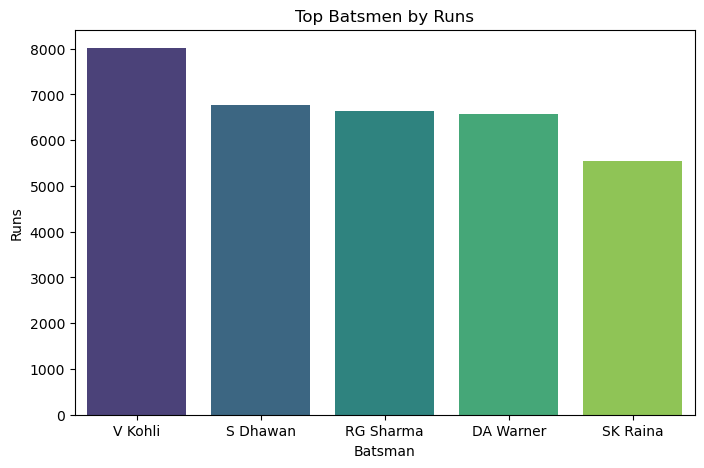

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt
sorted_batsman_dict = dict(sorted(batsman_dict.items(), key=lambda item: item[1][0], reverse=True))
sorted_batsman_dict
sorted_list=list(sorted_batsman_dict)
z=[]
for index,x in enumerate(sorted_list[0:5]):
    z.append(f'{index+1}) {x} has scored {sorted_batsman_dict[x][0]} runs in {sorted_batsman_dict[x][1]} innings.')
print('The Top Scorer are :')
for a in z:
    print(f'   {a}')
a=list(sorted_batsman_dict.items())
new=[]
for i in a :
    x=(i[0], i[1][0] , i[1][1])
    new.append(x)
b= pd.DataFrame(new[0:5],columns =['Batsman', 'Runs','Innings'])
b
plt.figure(figsize=(8, 5))
sns.barplot(data=b, x='Batsman', y='Runs', palette='viridis')
plt.title('Top Batsmen by Runs')

2) Who are the top wicket-takers?

In [24]:
bowlers_list = data['bowler'].unique().tolist()
valid_kinds = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled']
def bowler_wickets(data, bowlers_list):
    bowlers_dict = {}
    for bowler in bowlers_list:
        x=[]
        wickets = data[(data['bowler'] == bowler) & 
                      (data['dismissal_kind'].isin(valid_kinds))]
        total_wickets = len(wickets)
        x.append(total_wickets)
        x.append(len(data[data['bowler']==bowler]['match_id'].unique()))
        bowlers_dict[bowler] = x
    return bowlers_dict
bowler_dict = bowler_wickets(data, bowlers_list)
top_wicket_taker = max(bowler_dict, key=bowler_dict.get)
print(f"The top wicket-taker is {top_wicket_taker} with {bowler_dict[top_wicket_taker][0]} wickets in {bowler_dict[top_wicket_taker][1]} innings.")

The top wicket-taker is YS Chahal with 205 wickets in 159 innings.


The Top Scorer are :
   1) YS Chahal has taken 205 wickets in 159 innings.
   2) PP Chawla has taken 192 wickets in 191 innings.
   3) DJ Bravo has taken 183 wickets in 158 innings.
   4) B Kumar has taken 181 wickets in 176 innings.
   5) R Ashwin has taken 180 wickets in 208 innings.


C:\Users\tak\AppData\Local\Temp\ipykernel_15872\3592669311.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b, x='Bowler', y='Wickets', palette='viridis')


Text(0.5, 1.0, 'Top Bowlers by Wickets')

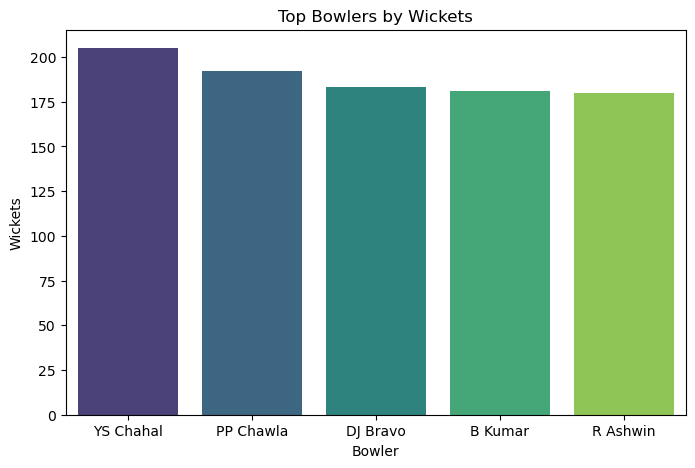

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sorted_bowlers_dict = dict(sorted(bowler_dict.items(), key=lambda item: item[1][0], reverse=True))
sorted_bowlers_list=list(sorted_bowlers_dict)
z=[]
for index,x in enumerate(sorted_bowlers_list[0:5]):
    z.append(f'{index+1}) {x} has taken {sorted_bowlers_dict[x][0]} wickets in {sorted_bowlers_dict[x][1]} innings.')
print('The Top Scorer are :')
for a in z:
    print(f'   {a}')
a = list(sorted_bowlers_dict.items())
new=[]
for i in a :
    x=(i[0], i[1][0] , i[1][1])
    new.append(x)
b= pd.DataFrame(new[0:5],columns =['Bowler', 'Wickets','Innings'])
plt.figure(figsize=(8, 5))
sns.barplot(data=b, x='Bowler', y='Wickets', palette='viridis')
plt.title('Top Bowlers by Wickets')


3) How many matches are in the dataset?

In [26]:

matches=data['match_id'].unique().tolist()
total_matches=len(matches)
print(f'There are {total_matches} matches in the dataset.')


There are 1095 matches in the dataset.


4) Which batters hit the most boundaries (4s and 6s)?

batter
S Dhawan     768
V Kohli      708
DA Warner    663
RG Sharma    599
SK Raina     506
Name: count, dtype: int64
CH Gayle has hit 359 sixes in 141 ininngs.
RG Sharma has hit 281 sixes in 251 ininngs.
V Kohli has hit 273 sixes in 244 ininngs.
AB de Villiers has hit 253 sixes in 170 ininngs.
MS Dhoni has hit 252 sixes in 228 ininngs.
S Dhawan has hit 768 fours in 221 ininngs.
V Kohli has hit 708 fours in 244 ininngs.
DA Warner has hit 663 fours in 184 ininngs.
RG Sharma has hit 599 fours in 251 ininngs.
SK Raina has hit 506 fours in 200 ininngs.


{'S Dhawan': [768, 221],
 'V Kohli': [708, 244],
 'DA Warner': [663, 184],
 'RG Sharma': [599, 251],
 'SK Raina': [506, 200]}

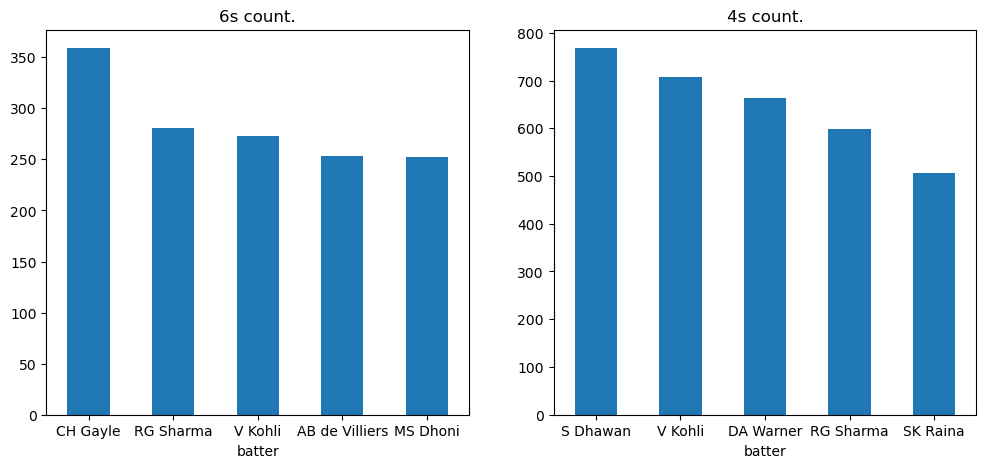

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
data['batsman_runs'].value_counts()
plt.subplot(1,2,1)
data[data['batsman_runs']==6]['batter'].value_counts()[0:5].plot.bar()
plt.title('6s count.')
plt.xticks(rotation=0)
# a=data[data['batsman_runs']==6]['batter'].value_counts()[0:5]
plt.subplot(1,2,2)
data[data['batsman_runs']==4]['batter'].value_counts()[0:5].plot.bar()
plt.title('4s count.')
plt.xticks(rotation=0)
print(data[data['batsman_runs']==4]['batter'].value_counts()[0:5])
players_dict1=dict(data[data['batsman_runs']==4]['batter'].value_counts()[0:5])
players_dict2=dict(data[data['batsman_runs']==6]['batter'].value_counts()[0:5])
df1=pd.DataFrame(players_dict1.items(),columns=['batsman','4s Count'])
df2=pd.DataFrame(players_dict2.items(),columns=['batsman','6s Count'])
for batsman,runs in players_dict1.items():
    x=[]
    x.append(runs)
    x.append(len(data[data['batter']==batsman]['match_id'].unique()))
    players_dict1[batsman] = x
for batsman,runs in players_dict2.items():
    x=[]
    x.append(runs)
    x.append(len(data[data['batter']==batsman]['match_id'].unique()))
    players_dict2[batsman] = x
for batsman,stats in players_dict2.items():
    print(f'{batsman} has hit {stats[0]} sixes in {stats[1]} ininngs.')    
for batsman,stats in players_dict1.items():
    ininngs=len(data[data['batter']==batsman]['match_id'].unique())
    print(f'{batsman} has hit {stats[0]} fours in {stats[1]} ininngs.')
players_dict1
# plt.bar()

5) What’s the strike rate of top batters?

   1) V Kohli's strike rate 128.51
   2) S Dhawan's strike rate 123.45
   3) RG Sharma's strike rate 127.92
   4) DA Warner's strike rate 135.43
   5) SK Raina's strike rate 132.54


<Axes: xlabel='Batsman', ylabel='Strike Rate'>

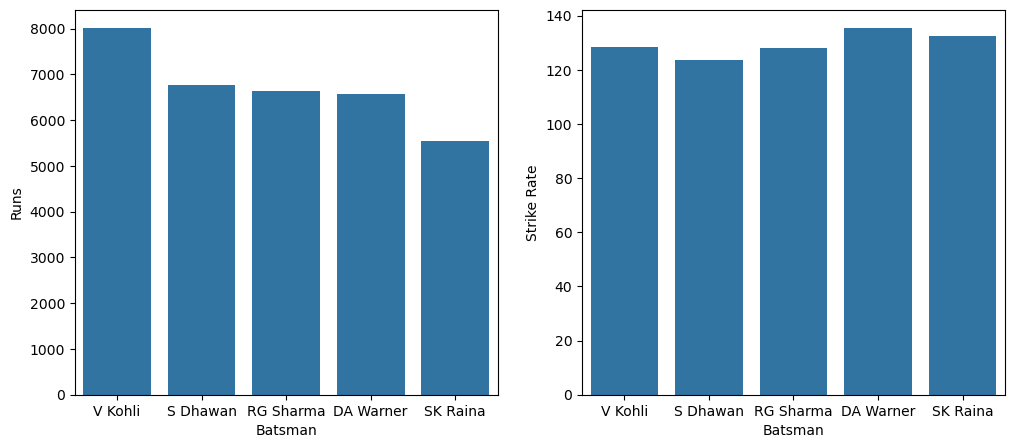

In [49]:
import numpy as np
sorted_batsman_list = list(sorted_batsman_dict)
sorted_batsman_list[0:5]
for batsman,stats in sorted_batsman_dict.items():
    total_balls=len(data[data['batter']==batsman]['ball'])
    total_runs=sorted_batsman_dict[batsman][0]
    strike_rate = (total_runs/total_balls)*100
    formatted_strike_rate = round(strike_rate,2)
    stats.append(formatted_strike_rate)
sorted_batsman_list = list(sorted_batsman_dict)
sorted_batsman_list[0:5]
sorted_batsman_list = list(sorted_batsman_dict)
z=[]
for index,x in enumerate(sorted_batsman_list[0:5]):
    z.append(f'{index+1}) {x}\'s strike rate {sorted_batsman_dict[x][2]}')
print('The strike rate of top batters:')
for a in z:
    print(f'   {a}')
a = list(sorted_batsman_dict.items())
new=[]
for i in a :
    x=(i[0], i[1][0] , i[1][1],i[1][2])
    new.append(x)
df = pd.DataFrame(new[0:5],columns=['Batsman','Runs','Innings','Strike Rate'])
df
# xpos = np.arange(len(df['Batsman']))
# plt.bar(xpos-0.2,df['Runs'],label='Runs',width=0.4)
# plt.bar(xpos+0.2,df['Strike Rate'],label='Strike Rate',width=0.4)
# plt.xticks(xpos,df['Batsman'])
# plt.legend(shadow=True)
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.barplot(df,x='Batsman',y='Runs')
plt.subplot(1,2,2)
sns.barplot(df,x='Batsman',y='Strike Rate')

6) Which bowlers have the best economy rates?

<Axes: xlabel='Bowler', ylabel='Economy'>

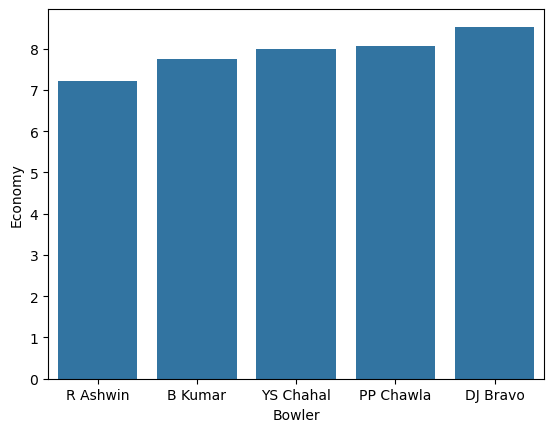

In [48]:

bowlers_list=data['bowler'].unique().tolist()
data['extras_type'].unique()
a=len(data[(data['bowler']=='YS Chahal')& (~data['extras_type'].isin(['wides','noballs']))]['ball'])
bowler_dict={}
for bowler in bowlers_list :
    stats=[]
    total_balls=len(data[(data['bowler']==bowler)& (~data['extras_type'].isin(['wides','noballs']))]['ball'])
    overs = total_balls // 6
    balls_left = total_balls % 6
    final = float(f"{overs}.{balls_left}")
    total_runs = data[data['bowler']==bowler]['total_runs'].sum()
    economy = total_runs / final
    economy = round(economy,2)
    stats.append(final)
    stats.append(economy)
    bowler_dict[bowler] = stats
bowler_dict
sorted_bowler_dict = dict(sorted(bowler_dict.items(),key = lambda x : x[1][1],reverse = False))
sorted_bowler_dict
for index,batsman in enumerate(sorted_bowlers_list[0:5]):
    print(f'{index+1}) {batsman} has bowled {sorted_bowler_dict[batsman][0]} overs with economy of {sorted_bowler_dict[batsman][1]}')
a = list(sorted_bowler_dict.items())
new=[]
for i in a :
    x=(i[0], i[1][0] , i[1][1],)
    new.append(x)
df = pd.DataFrame(new,columns=['Bowler','Overs','Economy'])
sns.barplot(df[df['Bowler'].isin(sorted_bowlers_list[0:5])],x='Bowler',y='Economy')


7) What are the highest and lowest score?

In [33]:
highet_core=data.groupby(['match_id','inning'])['total_runs'].sum().max()
Lowest_core=data.groupby(['match_id','inning'])['total_runs'].sum().min()

287

8) What is the highest individual score?

In [35]:
highest_individual_score =data.groupby(['match_id','inning','batter'])['batsman_runs'].sum().max()

175

9) What are highest runs conceded?

In [39]:
highest_runs_conceded=data.groupby(['match_id','inning','bowler'])['total_runs'].sum().max()

73

10) What are the highest runs in powerplay?

In [7]:
power_play = data[ data['over'] <= 6].groupby(['match_id', 'inning'])['total_runs'].sum().max()
power_play

133